Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


(-500, 500)

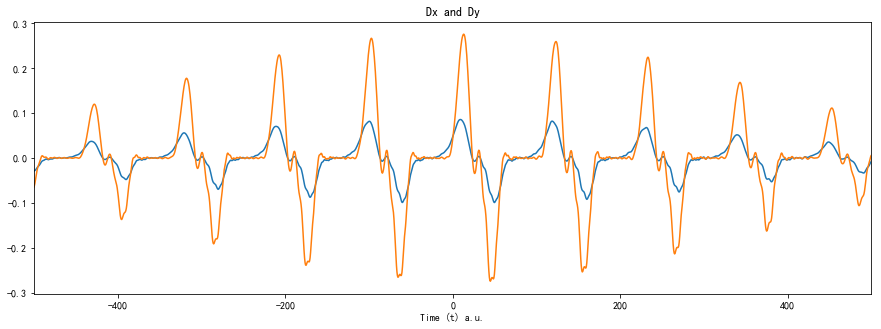

In [1]:
%pylab
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, fftshift

dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.5 + 3.17 * 0.08 **2 /(4 * w0**2)

data = loadtxt('data40/HHG_10_19.dat')
time, Ex, Ey, Ax, Ay, Dx, Dy = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]

Dx_1=zeros(Dx.size)
Dy_1=zeros(Dy.size)
Dx_1[Dx.size-1]=((Dx[Dx.size-1]-Dx[Dx.size-2])/dt)
Dy_1[Dy.size-1]=((Dy[Dy.size-1]-Dy[Dy.size-2])/dt)
for m in range(Dx.size-1):
    Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
    Dy_1[m]=((Dy[m+1]-Dy[m])/dt)
#
Dx_2=zeros(Dx.size)
Dy_2=zeros(Dy.size)
Dx_2[Dx.size-1]=((Dx_1[Dx.size-1]-Dx_1[Dx.size-2])/dt)
Dy_2[Dy.size-1]=((Dy_1[Dy.size-1]-Dy_1[Dy.size-2])/dt)
for n in range(Dx.size-1):
    Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
    Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)
    
figure(figsize=(15,5))
plot(time, Dx)
plot(time, Dy)
xlabel('Time (t) a.u.')
title('Dx and Dy')
xlim(-500, 500)

(0, 0.0005)

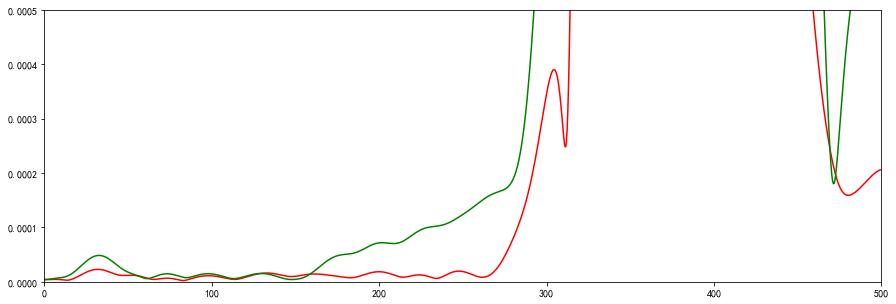

In [11]:
mul=16*Dx.size
Dx_ext = np.pad(Dx_2, (mul, mul), 'constant')
Dy_ext = np.pad(Dy_2, (mul, mul), 'constant')
frex = fft(2 * Dx_ext)
frey = fft(2 * Dy_ext)
time_ext = linspace(-(mul/Dx.size+0.5)*len(time)*dt,(mul/Dx.size+0.5)*len(time)*dt,Dy_ext.size)
f_scale = np.linspace(0, len(Dx_ext)*(2*np.pi*(1/(len(Dx_ext)*dt))), len(Dx_ext))
plot(100*f_scale/0.015199,(abs(frex)), lw=1.5, c='r')
plot(100*f_scale/0.015199,(abs(frey)), lw=1.5, c='g')
xlim(0, 500)
ylim(0, 0.0005)

/home/chris/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-50, 50)

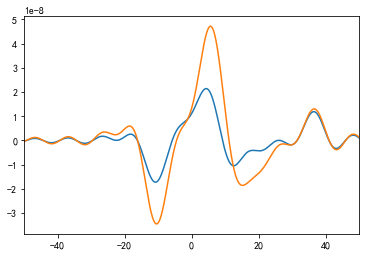

In [6]:
Dx_thz = zeros(Dx_ext.size, complex)
Dy_thz = zeros(Dy_ext.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time_ext)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time_ext)*dt))))
Dx_thz[0:con_1]=frex[0:con_1]
Dy_thz[0:con_1]=frey[0:con_1]
Dx_thz[(frex.size-con_2):frex.size]=frex[(frex.size-con_2):Dx_ext.size]
Dy_thz[(frex.size-con_2):frex.size]=frey[(frex.size-con_2):Dx_ext.size]
sx=ifft(Dx_thz)
sy=ifft(Dy_thz)
plot(time_ext/41.34, sx)
plot(time_ext/41.34, sy)
xlim(-50, 50)

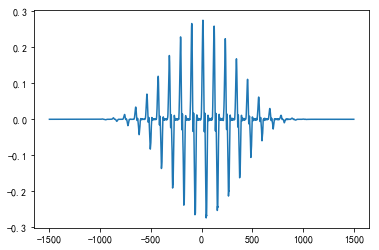

In [13]:
mul=10*Dx_2.size
Dx_ext=np.pad(Dx_2, (mul, mul), 'constant')
Dy_ext=np.pad(Dy_2, (mul, mul), 'constant')
time_ext = linspace(-(mul/Dx.size+0.5)*len(time)*dt,(mul/Dx.size+0.5)*len(time)*dt,Dy_ext.size)
f_scale = np.linspace(0, len(Dx_ext)*(2*np.pi*(1/(len(Dx_ext)*dt))), len(Dx_ext))
fre_x=fft(2 * Dx_ext)
fre_y=fft(2 * Dy_ext)

Dx_thz = zeros(Dx_ext.size, complex)
Dy_thz = zeros(Dy_ext.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time_ext)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time_ext)*dt))))
Dx_thz[0:con_1]=fre_x[0:con_1]
Dy_thz[0:con_1]=fre_y[0:con_1]
Dx_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_x[(Dx_ext.size-con_2):Dx_ext.size]
Dy_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_y[(Dx_ext.size-con_2):Dx_ext.size]

# cons=50
Fre_x=roll(Dx_thz,cons)
Fre_y=roll(Dy_thz,cons)
tds_x=ifft(Dx_thz)
tds_y=ifft(Dy_thz)
plot(time_ext/41.34,tds_x)
plot(time_ext/41.34,tds_y)
xlim(-150,150)

<Figure size 432x288 with 0 Axes>

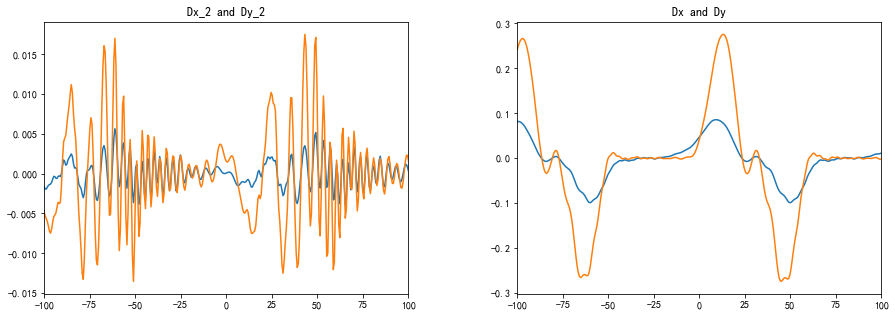

In [7]:
figure()
figure(figsize(15,5))
subplot(121)
plot(time,Dx_2)
plot(time,Dy_2)
xlim(-100,100)
title('Dx_2 and Dy_2')
subplot(122)
plot(time,Dx)
plot(time,Dy)
xlim(-100,100)
title('Dx and Dy')
subplots_adjust(wspace=0.3)

(0, 0.01)

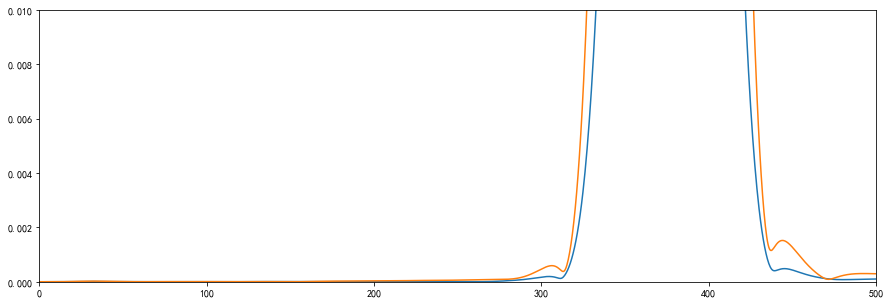

In [8]:
f_scale = np.linspace(0, len(Dx_ext)*(2*np.pi*(1/(len(Dx_ext)*dt))), len(Dx_ext))
plot(100*f_scale/0.015199, abs(fft(Dx_ext)))
plot(100*f_scale/0.015199, abs(fft(Dy_ext)))
xlim(0,500)
ylim(0,0.01)

(0, 1000)

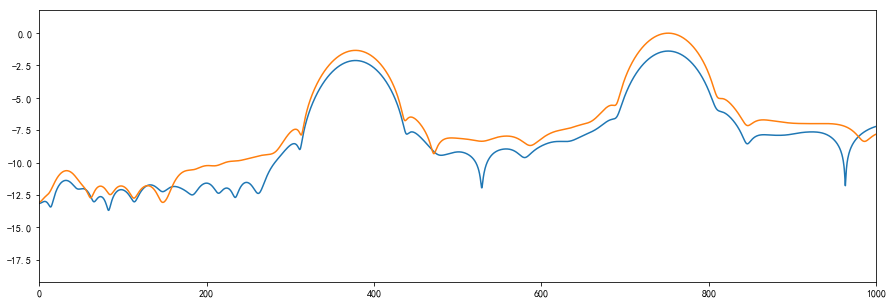

In [9]:
plot(100*f_scale/0.015199,log(abs(fft(Dx_ext))))
plot(100*f_scale/0.015199,log(abs(fft(Dy_ext))))
xlim(0,1000)